# Degeneracies in N/S baselines of PSA128 

Download data with the following command using your credentials:
```bash
    scp -r <username>@folio.sas.upenn.edu:/data4/paper/2013EoR/Analysis/ProcessedData/epoch1/omni_v4_xtalk/*yy*median* .
    scp -r <username>@folio.sas.upenn.edu:/data4/paper/2013EoR/2456620/zen.2456620.4*yy.uvcRREc .
    scp -r <username>@folio.sas.upenn.edu:/data4/paper/2013EoR/2456620/zen.2456620.4*yy.uvcRREcF .
```

In [1]:
import numpy as np
import capo 
import pylab as p
import glob
import aipy as a
import capo.omni as omni
from copy import deepcopy
%matplotlib inline

In [2]:
aa = a.cal.get_aa('psa6622_v003', np.array([.15]))
info = capo.omni.aa_to_info(aa, pols=['y'], ex_ants=[2,10,15,22,31,33,42,43,47,58,64,72,91,97,105,107,100,56,7,84], crosspols=['yy'])
#info = capo.omni.aa_to_info(aa, pols=['y'], ex_ants=[2,9,10,15,22,31,33,42,43,47,58,64,72,80,91,97,105,107,100,56,7,84], crosspols=['yy'])


/Users/jsdillon/anaconda/lib/python2.7/site-packages/capo/omni.py:119: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  antpos[i,0], antpos[i,1], antpos[i,2] = x,y,z


In [56]:
metaf, dataf, flagsf = capo.miriad.read_files(np.sort(glob.glob('zen.2456620.4[0-9]*yy.uvcRREcF')), 'cross', 'yy')
meta, data, flags = capo.miriad.read_files(np.sort(glob.glob('zen.2456620.4[0-9]*yy.uvcRREc')), 'cross', 'yy')
fcal_solution = np.load('zen.2456638.17384.yy.uvcRREc.median.fc.npz')

In [4]:
fcinfo = omni.aa_to_info(aa, pols=['y'], fcal=True, ex_ants=[2,10,15,22,31,33,42,43,47,58,64,72,91,97,105,107,100,56,7,84])

Loading FirstCalRedundantInfo class


In [5]:
datapack,wgtpack = {},{}
for (i,j) in data.keys():
    datapack[(i,j)] = data[(i,j)]['yy']
    wgtpack[(i,j)] = np.logical_not(flags[(i,j)]['yy'])
fqs = np.linspace(.1,.2,203)
dlys = np.fft.fftshift(np.fft.fftfreq(fqs.size, np.diff(fqs)[0]))
fc = omni.FirstCal(datapack,wgtpack,fqs,fcinfo)
sols = fc.run(finetune=True,verbose=False,plot=False,noclean=True,offset=False,average=True,window='none')



Geting M,O matrix
Geting N matrix
Shape of coefficient matrix:  (68918, 92)
Inverting A.T*N^{-1}*A matrix


In [6]:
solsPerTime = fc.run(finetune=True,verbose=False,plot=False,noclean=True,offset=False,average=False,window='none')

Geting M,O matrix
Geting N matrix
Shape of coefficient matrix:  (68918, 92)
Inverting A.T*N^{-1}*A matrix


In [7]:
fcinfo2 = omni.aa_to_info(aa, pols=['y'], fcal=True, ex_ants=[2,10,15,22,31,33,42,43,47,58,64,72,91,97,105,107,100,56,7,84],
                         ubls=[(64,10),(64,49),(64,3),(64,41),(64,25),(64,19),(64,48),(64,29),(64,24),(64,28),(64,55),(64,34),(64,27),(64,51),(64,57)])
fc2 = omni.FirstCal(datapack,wgtpack,fqs,fcinfo2)
solsEWonly = fc2.run(finetune=True,verbose=False,plot=False,noclean=True,offset=False,average=True,window='none')

Loading FirstCalRedundantInfo class
Geting M,O matrix
Geting N matrix
Shape of coefficient matrix:  (13604, 92)
Inverting A.T*N^{-1}*A matrix


In [8]:
fcgains = {ai: np.array(omni.get_phase(fqs,sols[ai])) for ai in info.subsetant}
fcdata = deepcopy(data)
for (ai,aj) in data.keys():
    if ai in info.subsetant and aj in info.subsetant:
        fcdata[(ai,aj)]['yy'] /= (fcgains[ai] * np.conj(fcgains[aj])).T



In [9]:
fcgainsPerTime = {ai: np.array(omni.get_phase(fqs,solsPerTime[ai])) for ai in info.subsetant}
fcptdata = deepcopy(data)
for (ai,aj) in data.keys():
    if ai in info.subsetant and aj in info.subsetant:
        fcptdata[(ai,aj)]['yy'] /= (fcgainsPerTime[ai] * np.conj(fcgainsPerTime[aj])).T



In [10]:
fcgainsEWOnly = {ai: np.array(omni.get_phase(fqs,solsEWonly[ai])) for ai in info.subsetant}
fcEWdata = deepcopy(data)
for (ai,aj) in data.keys():
    if ai in info.subsetant and aj in info.subsetant:
        fcEWdata[(ai,aj)]['yy'] /= (fcgainsEWOnly[ai] * np.conj(fcgainsEWOnly[aj])).T



In [11]:
# gains = {k: fcal_solution[k] for k in fcal_solution.keys() if k.endswith('y')}
# delays = {k: fcal_solution[k] for k in fcal_solution.keys() if k.startswith('d')}

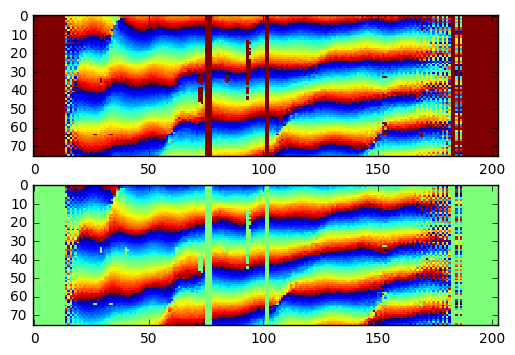

In [12]:
p.subplot(211)
capo.plot.waterfall(fcdata[36,70]['yy'].conj(), mode='phs')
p.subplot(212)
capo.plot.waterfall(data[36,70]['yy'].conj(), mode='phs')

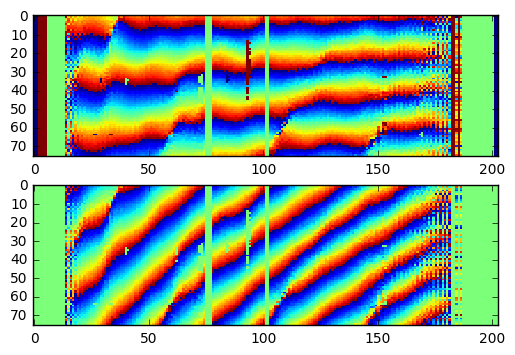

In [13]:
p.subplot(211)
capo.plot.waterfall(fcdata[13,108]['yy'], mode='phs')
p.subplot(212)
capo.plot.waterfall(data[13,108]['yy'], mode='phs')

(75, 125)

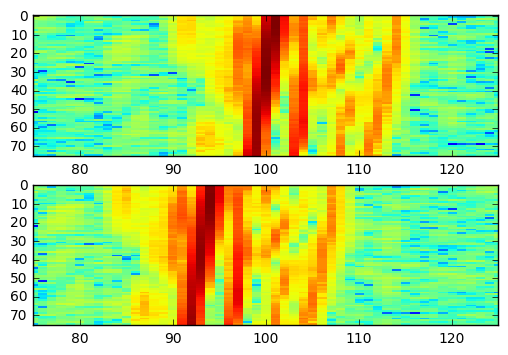

In [14]:
p.subplot(211)
capo.plot.waterfall(np.fft.fftshift(capo.arp.clean_transform(fcdata[13,108]['yy'], f=flags[13,108]['yy']),axes=-1))
p.xlim(75,125)
p.subplot(212)
capo.plot.waterfall(np.fft.fftshift(capo.arp.clean_transform(data[13,108]['yy'], f=flags[13,108]['yy']),axes=-1))
p.xlim(75,125)

In [15]:
m1, g1, v1 = omni.redcal(fcdata, info, uselogcal=True, removedegen=True, maxiter=50)
m2, g2, v2 = omni.redcal(fcdata, info, vis=v1, gains=g1, uselincal=True, removedegen=True, maxiter=50)

In [16]:
m1nord, g1nord, v1nord = omni.redcal(fcdata, info, uselogcal=True, removedegen=False, maxiter=50)
m2nord, g2nord, v2nord = omni.redcal(fcdata, info, vis=v1nord, gains=g1nord, uselincal=True, removedegen=False, maxiter=50)

In [17]:
m1oldfc, g1oldfc, v1oldfc = omni.redcal(dataf, info, uselogcal=True, removedegen=False, maxiter=50)
m2oldfc, g2oldfc, v2oldfc = omni.redcal(dataf, info, vis=v1nord, gains=g1nord, uselincal=True, removedegen=False, maxiter=50)

In [18]:
m1fcpt, g1fcpt, v1fcpt = omni.redcal(fcptdata, info, uselogcal=True, removedegen=True, maxiter=50)
m2fcpt, g2fcpt, v2fcpt = omni.redcal(fcptdata, info, vis=v1fcpt, gains=g1fcpt, uselincal=True, removedegen=True, maxiter=50)

In [19]:
m1fcEW, g1fcEW, v1fcEW = omni.redcal(fcEWdata, info, uselogcal=True, removedegen=True, maxiter=50)
m2fcEW, g2fcEW, v2fcEW = omni.redcal(fcEWdata, info, vis=v1fcEW, gains=g1fcEW, uselincal=True, removedegen=True, maxiter=50)

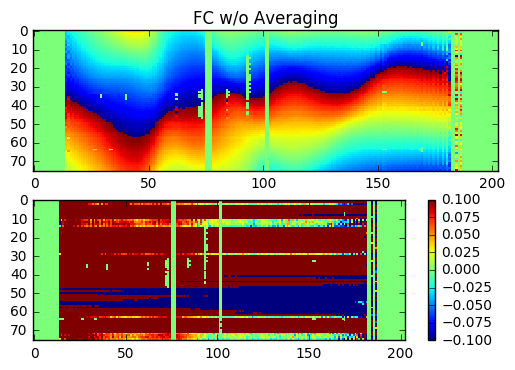

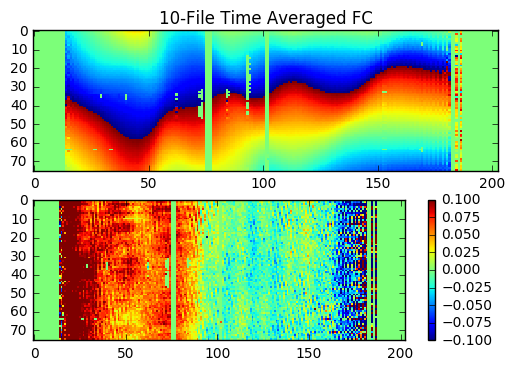

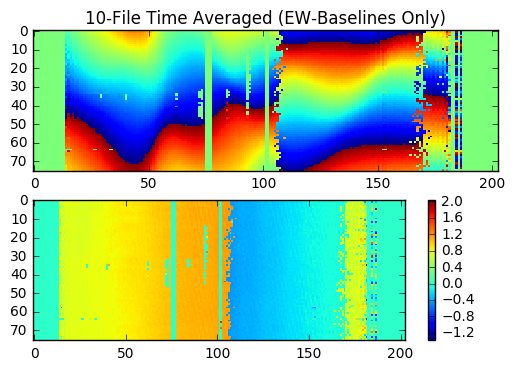

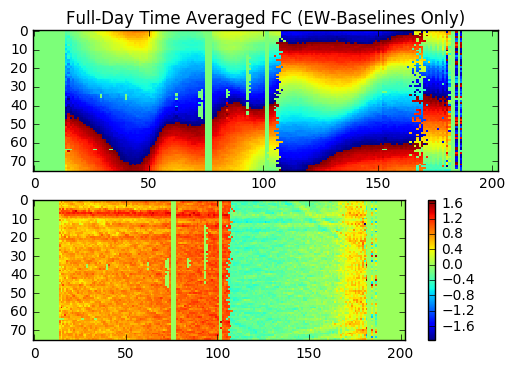

In [20]:
%matplotlib inline

#print v2['yy'].keys()
bl2plot = (0,95) #tilted
#bl2plot = (0,39) #pure NS
#bl2plot = (0,26) #pure EW

p.subplot(211)
p.title('FC w/o Averaging')
capo.plot.waterfall(v2fcpt['yy'][bl2plot], mode='phs')
p.subplot(212)
capo.plot.waterfall(g2fcpt['y'][81], mode='phs', mx=.1, drng=.2)
p.colorbar()
p.show()

# p.imshow(np.angle(fcgainsPerTime[0]).T)
# p.clim([0,.1])
# p.show()


p.subplot(211)
#capo.plot.waterfall(fcdata[bl2plot]['yy'], mode='phs')
p.title('10-File Time Averaged FC')
capo.plot.waterfall(v2['yy'][bl2plot], mode='phs')
p.subplot(212)
capo.plot.waterfall(g2['y'][81], mode='phs', mx=.1, drng=.2)
p.colorbar()
p.show()


p.subplot(211)
p.title('10-File Time Averaged (EW-Baselines Only)')
capo.plot.waterfall(v2fcEW['yy'][bl2plot], mode='phs')
p.subplot(212)
capo.plot.waterfall(g2fcEW['y'][81], mode='phs')
p.colorbar()
p.show()

p.subplot(211)
p.title('Full-Day Time Averaged FC (EW-Baselines Only)')
capo.plot.waterfall(v2oldfc['yy'][bl2plot], mode='phs')
p.subplot(212)
capo.plot.waterfall(g2oldfc['y'][81], mode='phs')
p.colorbar()
p.show()

# for red in info.get_reds():
#     if len(red) > 50: print red[0]

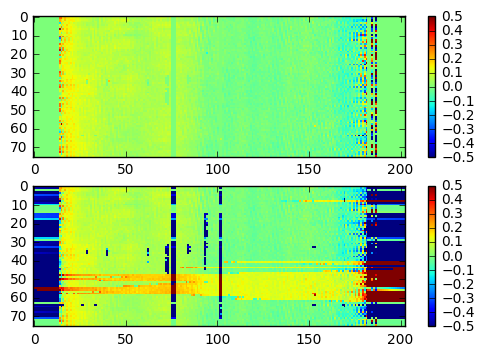

In [39]:
p.subplot(211)
capo.plot.waterfall(g2['y'][81], mode='phs', mx=.5, drng=1)
p.colorbar()
p.subplot(212)
capo.plot.waterfall(g2fcpt['y'][81]*fcgainsPerTime[81].T/fcgains[81].T, mode='phs', mx=.5, drng=1)
p.colorbar()
p.show()

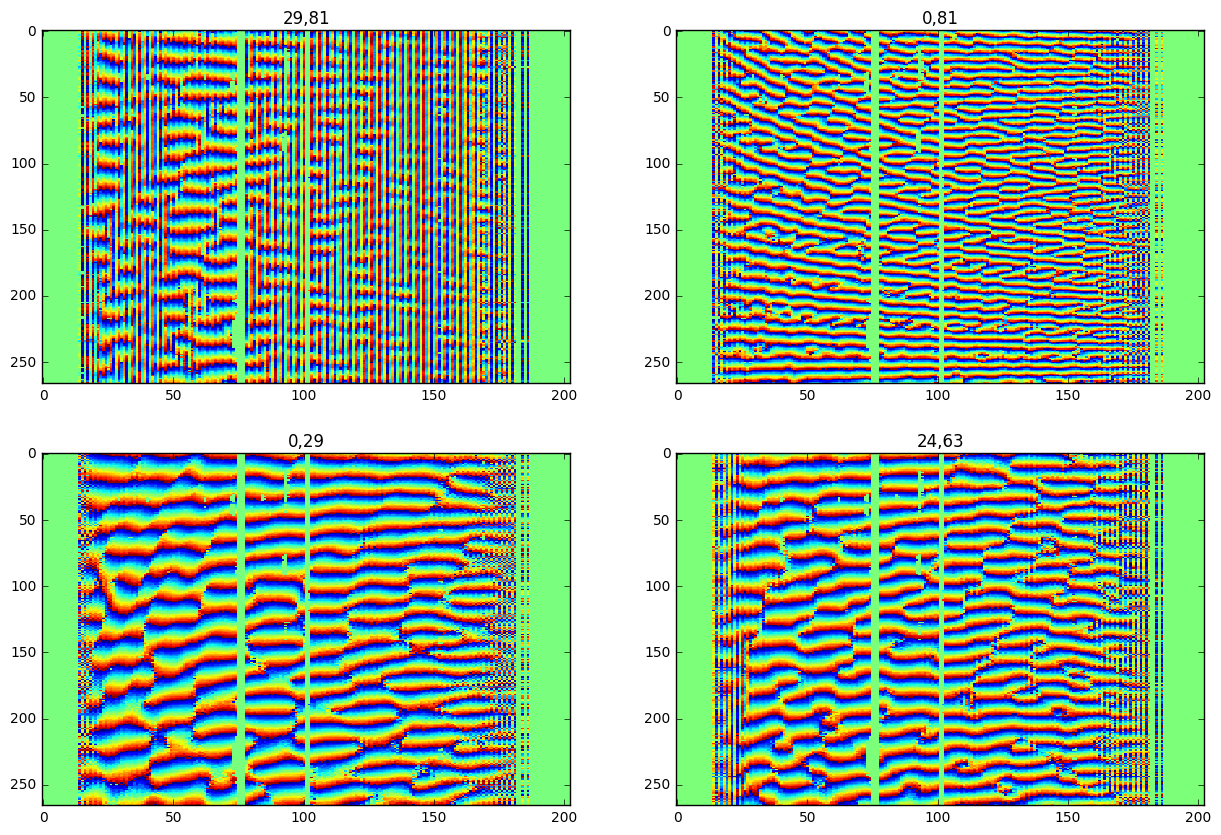

In [58]:
p.figure(figsize=(15,10))
p.subplot(221)
capo.plot.waterfall(data[(29,81)]['yy'],mode='phs')
p.title('29,81')
p.subplot(222)
capo.plot.waterfall(data[(0,81)]['yy'],mode='phs')
p.title('0,81')
p.subplot(223)
capo.plot.waterfall(data[(0,29)]['yy'],mode='phs')
p.title('0,29')
p.subplot(224)
capo.plot.waterfall(data[(24,63)]['yy'],mode='phs')
p.title('24,63')
# p.subplot(223)
# capo.plot.waterfall(data[(28,82)]['yy'],mode='phs')


p.show()

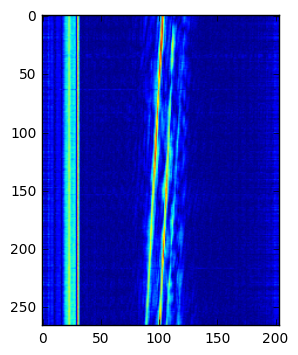

In [63]:
p.imshow(np.fft.fftshift(np.abs(np.fft.ifft(data[(29,81)]['yy'])),axes=1))
p.show()

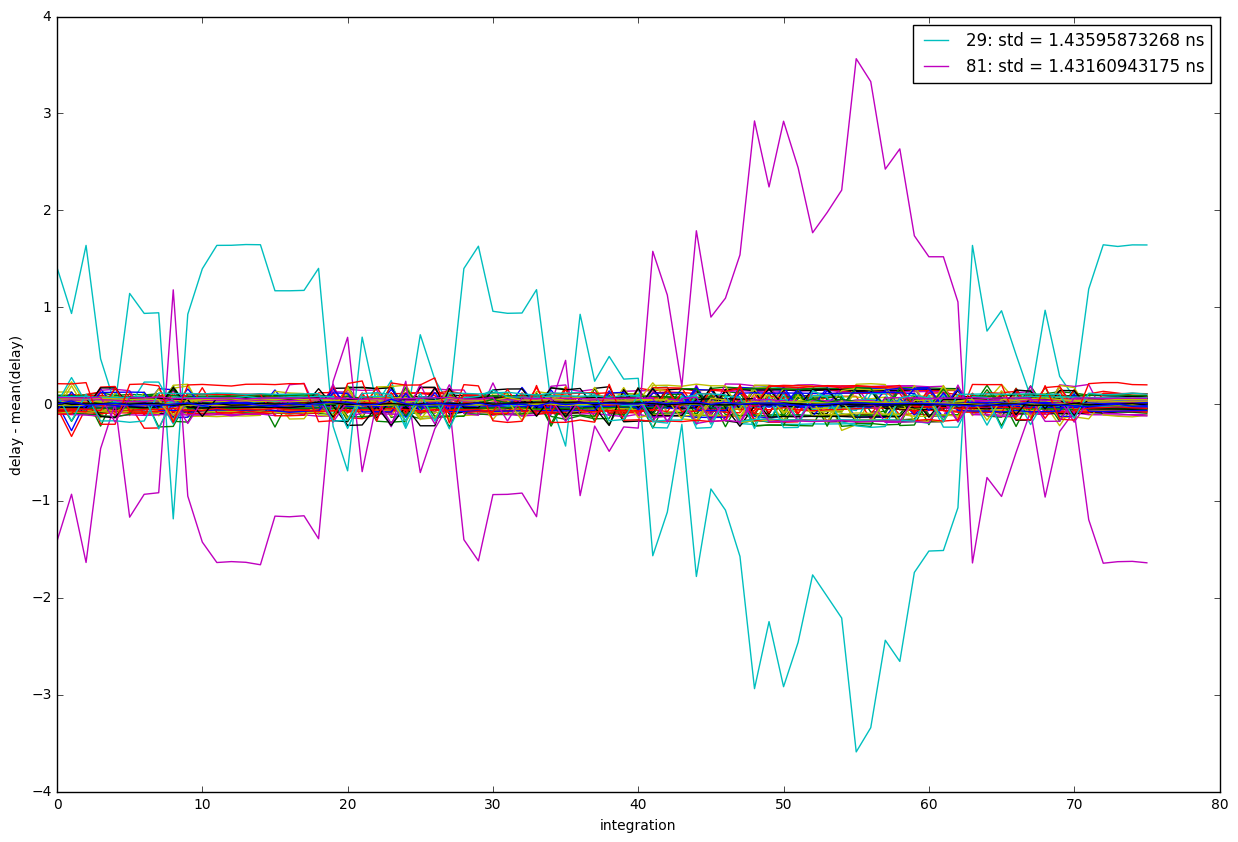

[  6.48936022e-04   1.07363374e-03   1.44314113e-03   1.73934680e-03
   1.88615666e-03   2.01015396e-03   2.10363393e-03   2.49266905e-03
   3.37017367e-03   3.38276058e-03   3.63194752e-03   4.20517567e-03
   4.37642792e-03   4.49806395e-03   4.57473873e-03   5.02979517e-03
   6.79320664e-03   6.87774842e-03   7.19588165e-03   7.61504049e-03
   7.98715875e-03   8.04215346e-03   9.13086928e-03   9.43877441e-03
   9.44853986e-03   9.84329591e-03   1.06931669e-02   1.09642664e-02
   1.16749242e-02   1.21651504e-02   1.28035470e-02   1.33231459e-02
   1.34420972e-02   1.42828240e-02   1.56948895e-02   1.57037885e-02
   1.59020840e-02   1.68463545e-02   1.76382813e-02   1.88856485e-02
   2.10021874e-02   2.16037110e-02   2.22668806e-02   2.31865836e-02
   2.43007573e-02   2.57790778e-02   2.64198524e-02   2.68755237e-02
   2.88151903e-02   2.92615672e-02   3.26323512e-02   3.39443962e-02
   3.57226465e-02   3.62755837e-02   4.08704850e-02   4.28872737e-02
   4.29046795e-02   4.29177981e-02

In [32]:
%matplotlib inline

p.figure(figsize=(15,10))
for ant in info.subsetant:
    delays = np.array(solsPerTime[ant]).flatten()
    if np.std(delays) > .2: p.plot(delays - np.mean(delays), label= (str(ant)+ ': std = ' + str(np.std(delays))+ ' ns'))
    else: p.plot(delays - np.mean(delays))    
p.xlabel('integration')
p.ylabel('delay - mean(delay)')
p.legend(loc=0)
p.show()

allTimeAvgDelays = np.array([sols[ant] for ant in info.subsetant]).flatten()
allDelaysAveraged = np.array([np.mean(np.array(solsPerTime[ant]).flatten()) for ant in info.subsetant]).flatten()
print np.sort(np.abs(allTimeAvgDelays - allDelaysAveraged))
print (allTimeAvgDelays - allDelaysAveraged)[info.subsetant==81]
print (allTimeAvgDelays - allDelaysAveraged)[info.subsetant==29]

# Trying to unwrap using my old technique (THIS DOESN'T APPEAR TO WORK)

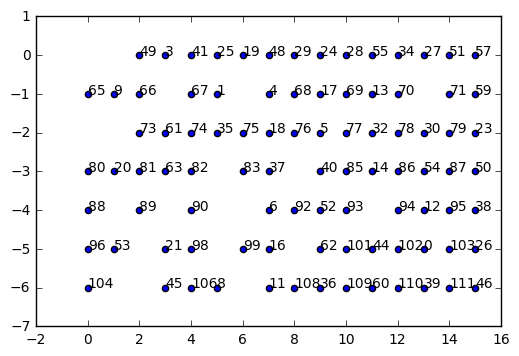

In [23]:

#print info.nAntenna
#print len(info.antloc)
info.subsetant
reds = info.get_reds()
#print [v2['yy'][rg[0]] for rg in reds]
#print info.ubl

#antloc dim 0 = South, dim 1 = West
#NE = 57, SW = 104
p.figure()
p.scatter(info.antloc[:,1],-info.antloc[:,0])
for x,y,label in zip(info.antloc[:,1],-info.antloc[:,0],info.subsetant): p.annotate(label,xy=(x,y))
    

In [24]:
# def OverallBandpassDegeneracyProjection(info, reds, g2, v2, pol='yy'):
#     """This function corrects degeneracies, but only after unwrapping across all channels. """    
#     Rgains = np.array([np.append(ai,1) for ai in info.antloc]); #Get the R matrix. R = [r_i 1], where ri are the positions
#     Mgains = np.linalg.pinv(Rgains.T.dot(Rgains)).dot(Rgains.T)
#     Rvis = np.hstack((-info.ubl, np.zeros((len(info.ubl),1))))

#     nTimes, nChans = v2[pol].values()[0].shape   
#     g3, v3 = deepcopy(g2), deepcopy(v2)
#     for t in range(nTimes):
#         allGainSols = np.array([[g2[pol[0]][ant][t,chan] for ant in info.subsetant] for chan in range(nChans)])
#         allVisSols = np.array([[v2[pol][blg[0]][t,chan] for blg in reds] for chan in range(nChans)])
#         finalGainSols, finalVisSols = np.array(allGainSols), np.array(allVisSols)
        
#         #overall phase unwrapping
#         phaseShift = np.mean(np.unwrap(np.angle(finalGainSols).T).T,axis=1)
#         for ant in range(info.nAntenna): finalGainSols[:,ant] *= np.exp(-1.0j * phaseShift)
        
#         for chan in range(nChans):
#             unwrappedGainPhases = np.array([np.unwrap(np.angle(allGainSols[0:chan+1,ant]))[chan] for ant in range(info.nAntenna)])
#             unwrappedDegenPhases = np.zeros_like(unwrappedGainPhases)
#             degenRemoved = Mgains.dot(unwrappedGainPhases) - Mgains.dot(unwrappedDegenPhases)
#             finalGainSols[chan,:] = finalGainSols[chan,:] * np.exp(-1.0j * Rgains.dot(degenRemoved))
#             finalVisSols[chan,:] = finalVisSols[chan,:] * np.exp(-1.0j * Rvis.dot(degenRemoved))
        
#         for chan in range(nChans):
#             for i,ant in enumerate(info.subsetant): g3[pol[0]][ant][t,chan] = finalGainSols[chan,i]
#             for i,blg in enumerate(reds): v3[pol][blg[0]][t,chan] = finalVisSols[chan,i]
        
#     return g3, v3

# g3, v3 = OverallBandpassDegeneracyProjection(info, reds, g2, v2)


NameError: name 'plt' is not defined

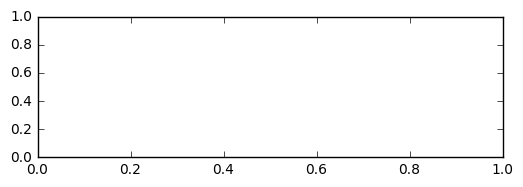

In [25]:
p.subplot(211)
#capo.plot.waterfall(g2['y'][0], mode='phs')
plt.plot(np.angle(g2['y'][0].T))
p.subplot(212)
plt.plot(np.angle(g3['y'][0].T));

# Doing our own Firstcal

In [ ]:
fcinfo = omni.aa_to_info(aa, pols=['y'], fcal=True, ex_ants=[2,10,15,22,31,33,42,43,47,58,64,72,91,97,105,107,100,56,7,84])

In [ ]:
datapack,wgtpack = {},{}
for (i,j) in data.keys():
    datapack[(i,j)] = data[(i,j)]['yy']
    wgtpack[(i,j)] = np.logical_not(flags[(i,j)]['yy'])
fqs = np.linspace(.1,.2,203)
dlys = np.fft.fftshift(np.fft.fftfreq(fqs.size, np.diff(fqs)[0]))
fc = omni.FirstCal(datapack,wgtpack,fqs,fcinfo)
sols = fc.run(finetune=True,verbose=False,plot=False,noclean=False,offset=False,average=True,window='none')


In [ ]:
gFirst = {ant: omni.get_phase(fqs, sols[ant]) for ant in sols.keys()}

In [ ]:
delayDiffs = [delays['d{}'.format(key)] - sols[key] for key in sols.keys()]

print delayDiffs

In [ ]:
sols2 = fc.run(finetune=True,verbose=False,plot=False,noclean=True,offset=False,average=True,window='none')

In [ ]:
delayDiffs = np.array([sols2[key][0] - sols[key][0] for key in sols.keys()]).flatten()

print delayDiffs